<a href="https://colab.research.google.com/github/sidharthanSC/developer-roadmap/blob/master/Group_Project_Final_PPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
#loading the matrix dataset which contains the gene expression values
mat_df=pd.read_csv("/content/drive/MyDrive/AIBD/Project/matrix.csv",header=None)
mat_df.head()

,0,1,2,3,4
0,AAACCCAAGGTAAGGA-1,ENSG00000000003,TSPAN6,Gene Expression,3
1,AAACCCAAGGTAAGGA-1,ENSG00000001461,NIPAL3,Gene Expression,1
2,AAACCCAAGGTAAGGA-1,ENSG00000001561,ENPP4,Gene Expression,1
3,AAACCCAAGGTAAGGA-1,ENSG00000001617,SEMA3F,Gene Expression,1
4,AAACCCAAGGTAAGGA-1,ENSG00000002330,BAD,Gene Expression,1


In [ ]:
mat_df.shape

(25115602, 5)

In [ ]:
#Inputting the columns of the dataset
mat_df.columns=["Barcode","ID","Gene","Discussion","Expression"]
mat_df.head()

,Barcode,ID,Gene,Discussion,Expression
0,AAACCCAAGGTAAGGA-1,ENSG00000000003,TSPAN6,Gene Expression,3
1,AAACCCAAGGTAAGGA-1,ENSG00000001461,NIPAL3,Gene Expression,1
2,AAACCCAAGGTAAGGA-1,ENSG00000001561,ENPP4,Gene Expression,1
3,AAACCCAAGGTAAGGA-1,ENSG00000001617,SEMA3F,Gene Expression,1
4,AAACCCAAGGTAAGGA-1,ENSG00000002330,BAD,Gene Expression,1


In [ ]:
#Loading the dataset, containing the name of the gene and the cluster count
df_with_labels=pd.read_csv("/content/drive/MyDrive/AIBD/Project/clustered.csv")
df_with_labels.head()

,Unnamed: 0,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
0,KRT8,1.002476e-56,1.500644,0.986,0.479,2.070916e-52,0,KRT8
1,FAM3B,4.421736e-52,1.834843,0.640,0.114,9.134423e-48,0,FAM3B
2,CXCL17,4.993105e-52,1.978573,0.592,0.102,1.031476e-47,0,CXCL17
3,TNFSF10,8.848251e-52,1.874026,0.877,0.381,1.827872e-47,0,TNFSF10
4,AGR2,2.139398e-51,1.608380,0.763,0.195,4.419568e-47,0,AGR2


In [ ]:
df_with_labels.columns= ['Gene', 'p_val', 'avg_log2FC', 'pct.1', 'pct.2', 'p_val_adj','cluster', 'gene']
df_with_labels.columns

Index(['Gene', 'p_val', 'avg_log2FC', 'pct.1', 'pct.2', 'p_val_adj', 'cluster',
       'gene'],
      dtype='object')

In [ ]:
#loading the file with addtioinal features regarding the dataset
df_additional_features= pd.read_csv('/content/drive/MyDrive/AIBD/Project/additional_features.csv')
df_additional_features.columns

Index(['Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA'], dtype='object')

In [ ]:
df_additional_features.columns=['Barcode', 'orig.ident', 'nCount_RNA', 'nFeature_RNA']
df_additional_features.head()

,Barcode,orig.ident,nCount_RNA,nFeature_RNA
0,AAACCCAAGGTAAGGA-1,SeuratProject,13920,3252
1,AAACCCAAGGTCCTGC-1,SeuratProject,12524,2984
2,AAACCCACATGGGTCC-1,SeuratProject,9198,2394
3,AAACCCAGTCACCGCA-1,SeuratProject,31777,5208
4,AAACCCAGTCTGTAGT-1,SeuratProject,9006,2284


In [ ]:
df_additional_features.shape

(9752, 4)

In [ ]:
mat_df["Discussion"].value_counts()

,count
Discussion,
Gene Expression,25115602


In [ ]:
# Dropping discussion column, because there is only one type of entry in that entire column
mat_df.drop("Discussion",inplace=True,axis=1)
mat_df.head()

,Barcode,ID,Gene,Expression
0,AAACCCAAGGTAAGGA-1,ENSG00000000003,TSPAN6,3
1,AAACCCAAGGTAAGGA-1,ENSG00000001461,NIPAL3,1
2,AAACCCAAGGTAAGGA-1,ENSG00000001561,ENPP4,1
3,AAACCCAAGGTAAGGA-1,ENSG00000001617,SEMA3F,1
4,AAACCCAAGGTAAGGA-1,ENSG00000002330,BAD,1


In [ ]:
df_with_labels= df_with_labels[['Gene','cluster']]
df_with_labels

,Gene,cluster
0,KRT8,0
1,FAM3B,0
2,CXCL17,0
3,TNFSF10,0
4,AGR2,0
...,...,...
13246,CTD-3203P2.3,7
13247,RP11-455F5.5,7
13248,C17orf107,7
13249,bP-21264C1.2,7


In [ ]:
#Merging the datasets using its common features
merged_df = pd.merge(df_with_labels,mat_df, on='Gene', how='inner')
merged_df

,Gene,cluster,Barcode,ID,Expression
0,KRT8,0,AAACCCAAGGTAAGGA-1,ENSG00000170421,4
1,KRT8,0,AAACCCATCTCGACGG-1,ENSG00000170421,18
2,KRT8,0,AACAAAGGTTGTTGTG-1,ENSG00000170421,13
3,KRT8,0,ACTTCCGCAAATGGAT-1,ENSG00000170421,8
4,KRT8,0,ACTTCCGCACTACTTT-1,ENSG00000170421,23
...,...,...,...,...,...
18600344,BTBD9,7,TTTGACTGTTTGAAAG-1,ENSG00000183826,1
18600345,BTBD9,7,TTTGGAGAGTCTGCAT-1,ENSG00000183826,1
18600346,BTBD9,7,TTTGGTTGTTCCTACC-1,ENSG00000183826,1
18600347,BTBD9,7,TTTGTTGAGGACAGTC-1,ENSG00000183826,2


In [ ]:
merged_df_1 = pd.merge(df_additional_features, merged_df, on='Barcode', how="inner")
merged_df_1

,Barcode,orig.ident,nCount_RNA,nFeature_RNA,Gene,cluster,ID,Expression
0,AAACCCAAGGTAAGGA-1,SeuratProject,13920,3252,KRT8,0,ENSG00000170421,4
1,AAACCCAAGGTAAGGA-1,SeuratProject,13920,3252,FAM3B,0,ENSG00000183844,5
2,AAACCCAAGGTAAGGA-1,SeuratProject,13920,3252,TNFSF10,0,ENSG00000121858,5
3,AAACCCAAGGTAAGGA-1,SeuratProject,13920,3252,AGR2,0,ENSG00000106541,14
4,AAACCCAAGGTAAGGA-1,SeuratProject,13920,3252,TSPAN1,0,ENSG00000117472,10
...,...,...,...,...,...,...,...,...
18600344,TTTGTTGTCTTTCCGG-1,SeuratProject,546,300,VAMP8,6,ENSG00000118640,2
18600345,TTTGTTGTCTTTCCGG-1,SeuratProject,546,300,CALM2,6,ENSG00000143933,1
18600346,TTTGTTGTCTTTCCGG-1,SeuratProject,546,300,RAC1,6,ENSG00000136238,1
18600347,TTTGTTGTCTTTCCGG-1,SeuratProject,546,300,BID,7,ENSG00000015475,1


In [ ]:
#Dropping since the columns has the same value for each row
merged_df_1.drop('orig.ident',axis=1,inplace=True)
merged_df_1

,Barcode,nCount_RNA,nFeature_RNA,Gene,cluster,ID,Expression
0,AAACCCAAGGTAAGGA-1,13920,3252,KRT8,0,ENSG00000170421,4
1,AAACCCAAGGTAAGGA-1,13920,3252,FAM3B,0,ENSG00000183844,5
2,AAACCCAAGGTAAGGA-1,13920,3252,TNFSF10,0,ENSG00000121858,5
3,AAACCCAAGGTAAGGA-1,13920,3252,AGR2,0,ENSG00000106541,14
4,AAACCCAAGGTAAGGA-1,13920,3252,TSPAN1,0,ENSG00000117472,10
...,...,...,...,...,...,...,...
18600344,TTTGTTGTCTTTCCGG-1,546,300,VAMP8,6,ENSG00000118640,2
18600345,TTTGTTGTCTTTCCGG-1,546,300,CALM2,6,ENSG00000143933,1
18600346,TTTGTTGTCTTTCCGG-1,546,300,RAC1,6,ENSG00000136238,1
18600347,TTTGTTGTCTTTCCGG-1,546,300,BID,7,ENSG00000015475,1


In [ ]:
#Shuffling the dataset
merged_df_1=merged_df_1.sample(frac=1)
merged_df_1=merged_df_1.reset_index()

In [ ]:
merged_df_1.drop(['index','Gene','ID'],axis=1,inplace=True)
merged_df_1

,Barcode,nCount_RNA,nFeature_RNA,cluster,Expression
0,TCCAGAAAGCAATAGT-1,34624,5985,2,1
1,TGGTGATCAGAAGTGC-1,19195,4306,2,2
2,CTCCCAAAGGTAGCCA-1,12075,3129,0,1
3,ATGAGTCAGCATGATA-1,11933,3355,6,2
4,TATCTTGAGCACTTTG-1,34855,4675,0,1
...,...,...,...,...,...
18600344,CCGGTGAAGTGGTTAA-1,8342,2151,0,1
18600345,ACAACCATCACGATAC-1,8093,2484,0,2
18600346,CCTAAGATCGGAGTGA-1,15693,3616,3,2
18600347,TGTAAGCAGACTCAAA-1,23573,4729,3,2


In [ ]:
#Encodeding the Barcode inorder to find correlations of Barcode with the data
def encode_dna_sequence(sequence):
    encoder = {'A': 1, 'C': 2, 'G': 3, 'T': 4, '-': 5, '1': 6}
    encoded_sequence = [(encoder[base]) for base in sequence]
    number_strings = [str(i) for i in encoded_sequence]
    concatenated_string = ''.join(number_strings)
    encoded_sequence = int(concatenated_string)
    return encoded_sequence

In [ ]:
merged_df_1["Barcode"]=merged_df_1["Barcode"].apply(encode_dna_sequence)
merged_df_1

,Barcode,nCount_RNA,nFeature_RNA,cluster,Expression
0,421343134411331456,6850,2056,3,1
1,343311342111224356,65766,6599,2,30
2,341324142311322256,38219,3323,5,1
3,432333434143142256,12431,2984,5,2
4,122434213311234256,41961,5448,0,1
...,...,...,...,...,...
18600344,324211121313133356,26125,4755,2,1
18600345,111232442324342456,8064,2039,0,2
18600346,442413442312342356,32379,5125,2,3
18600347,413334434322311156,6720,1763,3,3


In [ ]:
data=merged_df_1

In [ ]:
data["cluster"].value_counts()

,count
cluster,
0,8905142
2,5363656
3,1398475
1,1142075
4,600382
6,585271
5,381910
7,223438


In [ ]:
#Taking a smaller sample of data, due to its very large size and high computation cost if run all togethere
def boots(df, num_rows):
    sampled_rows = df.sample(n=num_rows, replace=True)
    return sampled_rows
data11=boots(data,50000)
data11["cluster"].value_counts()

,count
cluster,
0,23854
2,14469
3,3722
1,3097
4,1631
6,1588
5,1023
7,616


In [ ]:
data11

,Barcode,nCount_RNA,nFeature_RNA,cluster,Expression
4516075,ACTTTGTCAGGAGGTT-1,10160,2164,0,1
10353870,GTGTGGCAGGACAGTC-1,24430,4461,1,1
9010371,TACCCGTGTCGTGGTC-1,26676,5134,2,5
9538175,CTCAATTCAGACAATA-1,73759,7905,0,3
2309763,GATCAGTGTTGCCGCA-1,10722,2587,0,31
...,...,...,...,...,...
2918272,TCACTATTCAGCTTGA-1,23155,4213,0,60
11306216,GGCAGTCCATGTTACG-1,9168,2446,2,2
10567186,TAGTGCAAGTTTGAGA-1,18029,3303,0,45
12255937,GTCATCCGTTTACCAG-1,32900,6234,0,11


In [ ]:
l=[]
for i in data11["Barcode"]:
  l+=[[int(digit) for digit in str(i)]]

In [ ]:
#adding the values
i=0
j=0
l3=[]
while j<len(l[0])-2:
  l2=[]
  while i<len(l):
    l2+=[l[i][j]]
    i+=1
  l3+=[l2]
  j+=1
  i=0

# for i in l3:
#   print(i)

In [ ]:
data11.head()

,Barcode,nCount_RNA,nFeature_RNA,cluster,Expression
10082290,212143142234133256,4637,1676,2,2
14438994,324442342331441256,8983,2755,2,1
11240678,311421242231413456,6177,2256,2,1
15566779,131422142212333456,10279,2728,0,3
1934898,112333113311134356,20706,3333,2,2


In [ ]:
for i in range(len(l3)):
  data11[str(i)]=l3[i]
data11.head()

,Barcode,nCount_RNA,nFeature_RNA,cluster,Expression,0,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
10082290,212143142234133256,4637,1676,2,2,2,1,2,1,4,...,1,4,2,2,3,4,1,3,3,2
14438994,324442342331441256,8983,2755,2,1,3,2,4,4,4,...,3,4,2,3,3,1,4,4,1,2
11240678,311421242231413456,6177,2256,2,1,3,1,1,4,2,...,2,4,2,2,3,1,4,1,3,4
15566779,131422142212333456,10279,2728,0,3,1,3,1,4,2,...,1,4,2,2,1,2,3,3,3,4
1934898,112333113311134356,20706,3333,2,2,1,1,2,3,3,...,1,1,3,3,1,1,1,3,4,3


In [ ]:
data11_f=data11.drop(['Barcode'], axis=1)
data11_f.head()

,nCount_RNA,nFeature_RNA,cluster,Expression,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
10082290,4637,1676,2,2,2,1,2,1,4,3,1,4,2,2,3,4,1,3,3,2
14438994,8983,2755,2,1,3,2,4,4,4,2,3,4,2,3,3,1,4,4,1,2
11240678,6177,2256,2,1,3,1,1,4,2,1,2,4,2,2,3,1,4,1,3,4
15566779,10279,2728,0,3,1,3,1,4,2,2,1,4,2,2,1,2,3,3,3,4
1934898,20706,3333,2,2,1,1,2,3,3,3,1,1,3,3,1,1,1,3,4,3


In [ ]:
#Printing the correlation matrix
data11_f.corr()

,nCount_RNA,nFeature_RNA,cluster,Expression,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
nCount_RNA,1.000000,0.873498,0.021574,0.077286,0.001077,-0.002136,-0.043784,-0.004569,0.017435,-0.004686,-0.016494,-0.026676,0.009243,-0.012074,-0.004733,-0.011126,-0.026443,-0.007415,-0.009415,-0.013216
nFeature_RNA,0.873498,1.000000,0.030412,0.061250,0.004047,-0.002890,-0.032765,-0.010611,0.025065,-0.006687,-0.012287,-0.012434,-0.011088,-0.020169,-0.006047,-0.019470,-0.010152,-0.002610,-0.013024,-0.007760
cluster,0.021574,0.030412,1.000000,-0.059681,0.008206,-0.002353,0.004284,-0.004000,-0.004488,0.004009,-0.003963,-0.006632,-0.001558,0.005230,-0.004154,0.002955,0.003941,-0.003140,-0.005775,-0.001312
Expression,0.077286,0.061250,-0.059681,1.000000,0.000976,-0.003547,-0.003529,-0.001280,0.005168,-0.005110,-0.000815,-0.003574,-0.000078,0.004341,-0.003353,-0.003968,0.001941,0.002913,0.000233,-0.002317
0,0.001077,0.004047,0.008206,0.000976,1.000000,0.013455,-0.070262,0.027228,0.101041,0.056147,0.073228,0.004541,-0.022742,0.002827,0.020310,0.005265,0.016304,-0.021685,0.004835,0.009235
1,-0.002136,-0.002890,-0.002353,-0.003547,0.013455,1.000000,-0.016997,-0.082031,-0.024201,0.118553,0.057115,0.012100,0.000519,-0.003880,-0.005982,-0.008522,0.006417,-0.001446,-0.003395,0.012070
2,-0.043784,-0.032765,0.004284,-0.003529,-0.070262,-0.016997,1.000000,-0.033183,-0.073419,-0.000635,0.061557,0.003614,-0.011133,-0.011508,0.000587,-0.020442,-0.004743,-0.012047,-0.005923,0.022607
3,-0.004569,-0.010611,-0.004000,-0.001280,0.027228,-0.082031,-0.033183,1.000000,0.002697,-0.025025,-0.008928,-0.007037,-0.006126,-0.016439,0.000155,-0.005077,0.007666,0.013867,0.000613,-0.019617
4,0.017435,0.025065,-0.004488,0.005168,0.101041,-0.024201,-0.073419,0.002697,1.000000,0.061339,-0.060894,0.008599,0.015885,-0.025258,-0.007124,0.007886,0.015581,-0.004365,0.015526,-0.007712
5,-0.004686,-0.006687,0.004009,-0.005110,0.056147,0.118553,-0.000635,-0.025025,0.061339,1.000000,0.032883,0.011580,-0.009127,-0.006177,-0.012340,-0.003145,0.014361,-0.004106,0.000620,-0.000770


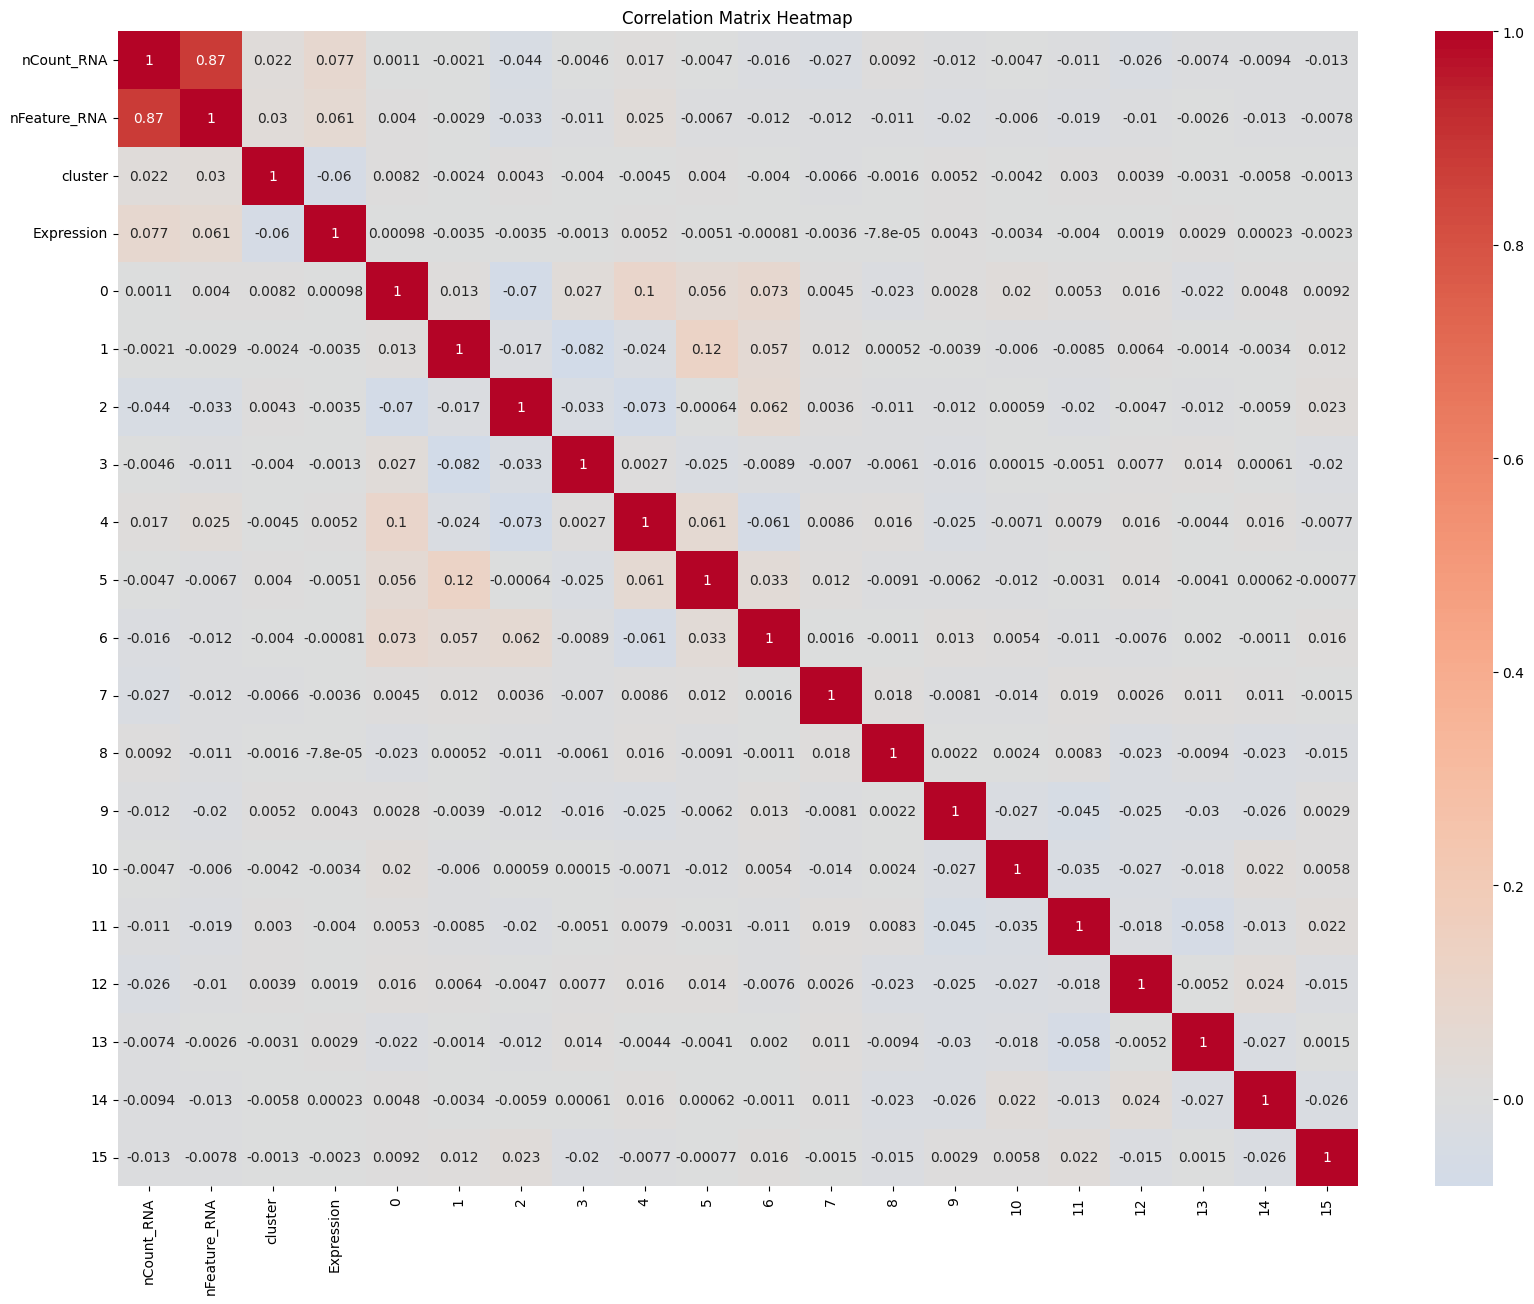

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(data11_f.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#Dropping the "Barcode" column for the dataset due to its low correlation
data111=data11.drop("Barcode",axis=1)

In [ ]:
data111["cluster"].value_counts()

,count
cluster,
0,23854
2,14469
3,3722
1,3097
4,1631
6,1588
5,1023
7,616


In [ ]:
#Splitting datasets into X and y
X=data111.drop("cluster",axis=1)
y=data111["cluster"]

In [ ]:
#Spliting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Classfication models for mutli - label classification
xgb_model = xgb.XGBClassifier(objective="multi:softmax",
                                                   learning_rate=0.1,
                                                   num_class=8
                              )


lgb_model = lgb.LGBMClassifier(objective="multiclass",
                                                   learning_rate=0.1,
                                                   num_leaves=31,
                                                   min_child_samples=5,
                                                   n_estimators=100,
                                                   num_class=8
                               )


knn_model=KNeighborsClassifier(n_neighbors=8)


In [ ]:
#Model fitting for XGBClassifier
xgb_model.fit(X_train,y_train)
prediction=xgb_model.predict(X_test)
print(np.unique(prediction))

[0 1 2 4 6]


In [ ]:
#Accuracy obtained
print("accuracy",accuracy_score(prediction,y_test))

accuracy 0.4724


In [ ]:
#confusion matrix
cm=confusion_matrix(y_test,prediction)
cm

array([[4518,    0,  231,    0,    1,    0,    0,    0],
       [ 590,    3,   24,    0,    0,    0,    0,    0],
       [2693,    0,  203,    0,    0,    0,    1,    0],
       [ 718,    0,   61,    0,    0,    0,    0,    0],
       [ 279,    0,   23,    0,    0,    0,    0,    0],
       [ 190,    1,   10,    0,    0,    0,    0,    0],
       [ 298,    0,   23,    0,    0,    0,    0,    0],
       [ 125,    0,    8,    0,    0,    0,    0,    0]])

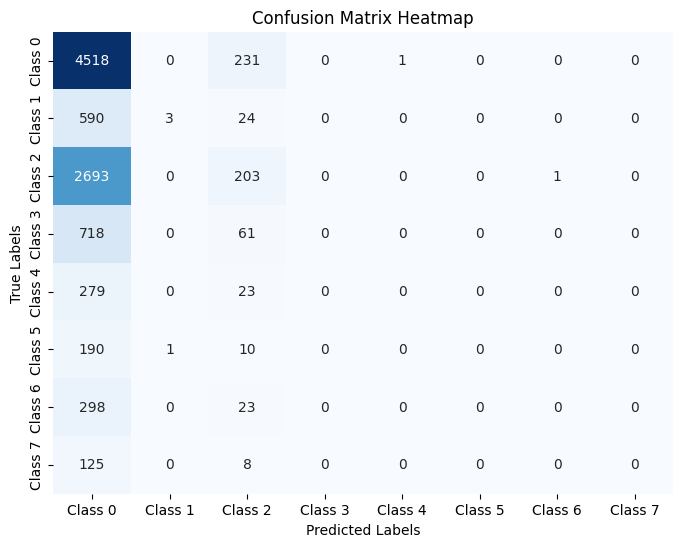

In [ ]:
#For plotting the confusion matrix
column_names = ["Class 0", "Class 1","Class 2","Class 3","Class 4","Class 5","Class 6","Class 7"]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(np.array(cm), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=column_names, yticklabels=column_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
#Model Fitting for LGBMClassifier
lgb_model.fit(X_train,y_train)
prediction1=lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 3
[LightGBM] [Info] Start training from score -0.733813
[LightGBM] [Info] Start training from score -2.820100
[LightGBM] [Info] Start training from score -1.244187
[LightGBM] [Info] Start training from score -2.583623
[LightGBM] [Info] Start training from score -3.452228
[LightGBM] [Info] Start training from score -3.877622
[LightGBM] [Info] Start training from score -3.405959
[LightGBM] [Info] Start training from score -4.500810


In [ ]:
unique=np.unique(prediction1)
#Accuracy obtained
print("accuracy",accuracy_score(y_test,prediction1))
print(unique)

accuracy 0.473
[0 1 2 3 4 5 6 7]


In [ ]:
#Confusion matrix
cm1=confusion_matrix(y_test,prediction1)
cm1

array([[4507,    4,  227,    2,    4,    2,    2,    2],
       [ 583,    1,   32,    0,    0,    1,    0,    0],
       [2675,    0,  221,    0,    0,    1,    0,    0],
       [ 709,    0,   70,    0,    0,    0,    0,    0],
       [ 275,    0,   26,    1,    0,    0,    0,    0],
       [ 192,    1,    8,    0,    0,    0,    0,    0],
       [ 295,    0,   24,    1,    0,    0,    1,    0],
       [ 120,    0,   13,    0,    0,    0,    0,    0]])

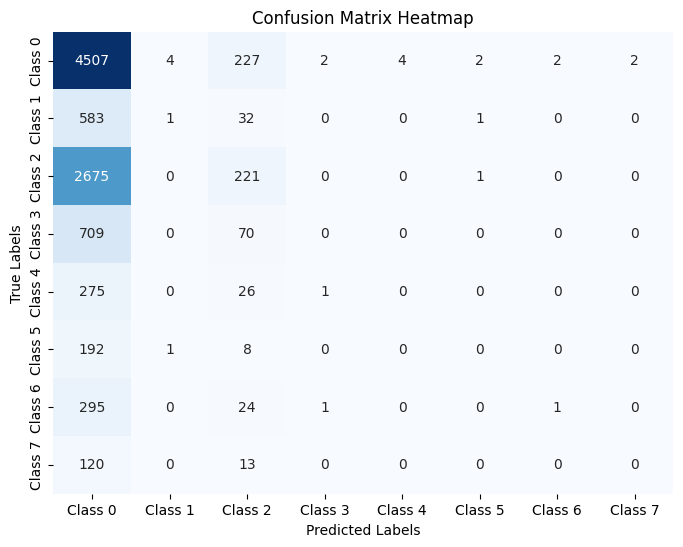

In [ ]:
#plotting the confusion matrix
column_names = ["Class 0", "Class 1","Class 2","Class 3","Class 4","Class 5","Class 6","Class 7"]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(np.array(cm1), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=column_names, yticklabels=column_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
#Model fitting for KNN Classifier
knn_model.fit(X_train,y_train)
prediction2=knn_model.predict(X_test)

In [ ]:
#Accuracy obtained
print("accuracy",accuracy_score(y_test,prediction2))
np.unique(prediction2)

accuracy 0.4368


array([0, 1, 2, 3, 4, 6])

In [ ]:
#confusion matrix
cm2=confusion_matrix(y_test,prediction2)
cm2

array([[3669,   37, 1001,   39,    2,    0,    2,    0],
       [ 480,    4,  128,    3,    1,    0,    1,    0],
       [2166,   14,  687,   26,    2,    0,    2,    0],
       [ 574,    0,  196,    7,    0,    0,    2,    0],
       [ 225,    1,   75,    1,    0,    0,    0,    0],
       [ 156,    4,   40,    1,    0,    0,    0,    0],
       [ 247,    1,   67,    5,    0,    0,    1,    0],
       [ 100,    0,   31,    2,    0,    0,    0,    0]])

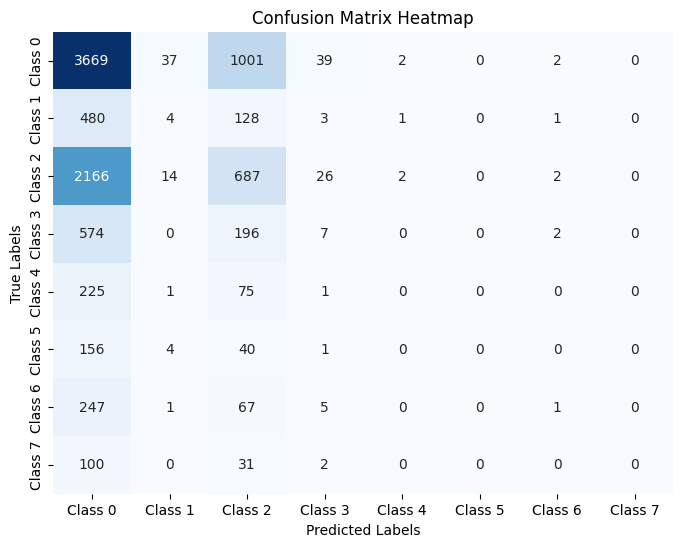

In [ ]:
#plotting the confusion matrix
column_names = ["Class 0", "Class 1","Class 2","Class 3","Class 4","Class 5","Class 6","Class 7"]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(np.array(cm2), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=column_names, yticklabels=column_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train2=to_categorical(y_train)
y_test2=to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2

In [ ]:
gating_train_data = np.concatenate((X_train,
                                    xgb_model.predict_proba(X_train)[:, 1].reshape(-1, 1),
                                    lgb_model.predict_proba(X_train)[:, 1].reshape(-1, 1),
                                    knn_model.predict_proba(X_train)[:, 1].reshape(-1, 1)),axis=1)

In [ ]:
# Standardize features
# scaler = StandardScaler()
# gating_train_data_scaled = scaler.fit_transform(gating_train_data)

In [ ]:
gating_model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(gating_train_data_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

gating_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
gating_model.fit(gating_train_data, y_train2, epochs=100, validation_split=0.2, callbacks=[early_stopping], batch_size=64)

Epoch 1/100
500/500 [==============================] - 9s 6ms/step - loss: 2.4923 - accuracy: 0.2587 - val_loss: 1.7079 - val_accuracy: 0.4640
Epoch 2/100
500/500 [==============================] - 2s 5ms/step - loss: 1.8305 - accuracy: 0.4374 - val_loss: 1.6304 - val_accuracy: 0.4656
Epoch 3/100
500/500 [==============================] - 3s 5ms/step - loss: 1.6929 - accuracy: 0.4651 - val_loss: 1.6095 - val_accuracy: 0.4656
Epoch 4/100
500/500 [==============================] - 4s 8ms/step - loss: 1.6380 - accuracy: 0.4758 - val_loss: 1.5900 - val_accuracy: 0.4647
Epoch 5/100
500/500 [==============================] - 3s 6ms/step - loss: 1.6060 - accuracy: 0.4777 - val_loss: 1.5735 - val_accuracy: 0.4655
Epoch 6/100
500/500 [==============================] - 3s 5ms/step - loss: 1.5759 - accuracy: 0.4785 - val_loss: 1.5542 - val_accuracy: 0.4656
Epoch 7/100
500/500 [==============================] - 3s 5ms/step - loss: 1.5486 - accuracy: 0.4800 - val_loss: 1.5346 - val_accuracy: 0.4650

In [ ]:
gating_test_data = np.concatenate((
    X_test,
    xgb_model.predict_proba(X_test)[:, 1].reshape(-1, 1),
    lgb_model.predict_proba(X_test)[:, 1].reshape(-1, 1),
    knn_model.predict_proba(X_test)[:, 1].reshape(-1, 1)
), axis=1)

In [ ]:
score = gating_model.evaluate(gating_test_data, y_test2)

313/313 [==============================] - 1s 3ms/step - loss: 1.4367 - accuracy: 0.4750


In [ ]:
#print("accuracy obtained:",score[1])

In [ ]:
data111.to_csv('data111.csv')

In [ ]:
#data111=pd.read_csv('/content/drive/MyDrive/AIBD/Project/data111.csv')

In [ ]:
data111

,nCount_RNA,nFeature_RNA,cluster,Expression
4516075,10160,2164,0,1
10353870,24430,4461,1,1
9010371,26676,5134,2,5
9538175,73759,7905,0,3
2309763,10722,2587,0,31
...,...,...,...,...
2918272,23155,4213,0,60
11306216,9168,2446,2,2
10567186,18029,3303,0,45
12255937,32900,6234,0,11


In [ ]:
def mapping(cluster):
  map_dict={0:1,2:3}
  #map_dict= {0:1,2:3,4:5}  #astrocyte->label4 , T-cell->label5 done
  #map_dict= {0:1,2:3,7:5}  #mdc and t cell done
  #map_dict= {0:1,2:3,7:4}  #atrocyte, mdc done
  #map_dict={0:1,2:3,6:5}  #keratinocyte, t-cell done
  #map_dict={0:1,2:3,6:4}  #keratinocyte astrocyte
  if cluster in map_dict:
    cluster=map_dict[cluster]
  return cluster

In [ ]:
data111['cluster_fin']=data111['cluster'].apply(mapping)

In [ ]:
data111['cluster2']=data111['cluster'].apply(mapping)

In [ ]:
data111['cluster3']=data111['cluster'].apply(mapping)

In [ ]:
data111['cluster4']=data111['cluster'].apply(mapping)

In [ ]:
data111['cluster5']=data111['cluster'].apply(mapping)

In [ ]:
data111['cluster6']=data111['cluster'].apply(mapping)

In [ ]:
data111['cluster2'].value_counts()

cluster2
1    26954
3    18223
5     2598
6     1648
7      577
Name: count, dtype: int64

In [ ]:
data111['cluster3'].value_counts()

cluster3
1    26954
3    18223
6     1648
5     1606
4     1569
Name: count, dtype: int64

In [ ]:
data111['cluster4'].value_counts()

cluster4
1    26954
3    18223
4     2146
6     1648
5     1029
Name: count, dtype: int64

In [ ]:
data111['cluster5'].value_counts()

cluster5
1    26954
3    18223
5     2677
4     1569
7      577
Name: count, dtype: int64

In [ ]:
data111['cluster6'].value_counts()

cluster6
1    26954
3    18223
4     3217
5     1029
7      577
Name: count, dtype: int64

In [ ]:
data111

,nCount_RNA,nFeature_RNA,cluster,Expression,cluster_fin
4516075,10160,2164,0,1,1
10353870,24430,4461,1,1,1
9010371,26676,5134,2,5,3
9538175,73759,7905,0,3,1
2309763,10722,2587,0,31,1
...,...,...,...,...,...
2918272,23155,4213,0,60,1
11306216,9168,2446,2,2,3
10567186,18029,3303,0,45,1
12255937,32900,6234,0,11,1


In [ ]:
X_f=data111.drop(['cluster_fin','cluster'],axis=1)
y_f=data111['cluster_fin']

In [ ]:
X_1=data111.drop(["cluster2","cluster"],axis=1)
y_1=data111["cluster2"]

In [ ]:
X_cluster3=data111.drop(["cluster2","cluster","cluster3","cluster4","cluster5","cluster6"],axis=1)
y_cluster3=data111["cluster3"]

In [ ]:
X_cluster4=data111.drop(["cluster2","cluster","cluster3","cluster4","cluster5","cluster6"],axis=1)
y_cluster4=data111["cluster4"]

In [ ]:
X_cluster5=data111.drop(["cluster2","cluster","cluster3","cluster4","cluster5","cluster6"],axis=1)
y_cluster5=data111["cluster5"]

In [ ]:
X_cluster6=data111.drop(["cluster2","cluster","cluster3","cluster4","cluster5","cluster6"],axis=1)
y_cluster6=data111["cluster6"]

In [ ]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, random_state=42)

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [ ]:
X_train_clus3, X_test_clus3, y_train_clus3, y_test_clus3 = train_test_split(X_cluster3, y_cluster3, test_size=0.2, random_state=42)

In [ ]:
X_train_clus4, X_test_clus4, y_train_clus4, y_test_clus4 = train_test_split(X_1, y_cluster4, test_size=0.2, random_state=42)

In [ ]:
X_train_clus5, X_test_clus5, y_train_clus5, y_test_clus5= train_test_split(X_1, y_cluster5, test_size=0.2, random_state=42)

In [ ]:
X_train_clus6, X_test_clus6, y_train_clus6, y_test_clus6 = train_test_split(X_1, y_cluster6, test_size=0.2, random_state=42)

In [ ]:
lgb_model_2 = lgb.LGBMClassifier(objective="multiclass",
                                                   learning_rate=0.1,
                                                   num_leaves=31,
                                                   min_child_samples=5,
                                                   n_estimators=100,
                                                   num_class=5
                                )
lgb_model_3 = lgb.LGBMClassifier(objective="multiclass",
                                                   learning_rate=0.1,
                                                   num_leaves=31,
                                                   min_child_samples=5,
                                                   n_estimators=100,
                                                   num_class=5
                                )
lgb_model_4 = lgb.LGBMClassifier(objective="multiclass",
                                                   learning_rate=0.1,
                                                   num_leaves=31,
                                                   min_child_samples=5,
                                                   n_estimators=100,
                                                   num_class=5
                                )
lgb_model_5 = lgb.LGBMClassifier(objective="multiclass",
                                                   learning_rate=0.1,
                                                   num_leaves=31,
                                                   min_child_samples=5,
                                                   n_estimators=100,
                                                   num_class=5
                                )
lgb_model_6 = lgb.LGBMClassifier(objective="multiclass",
                                                   learning_rate=0.1,
                                                   num_leaves=31,
                                                   min_child_samples=5,
                                                   n_estimators=100,
                                                   num_class=5
                                )
lgb_model_f = lgb.LGBMClassifier(objective="multiclass",
                                                   learning_rate=0.1,
                                                   num_leaves=31,
                                                   min_child_samples=5,
                                                   n_estimators=100,
                                                   num_class=5
                                )

In [ ]:
X_f

,nCount_RNA,nFeature_RNA,Expression
4516075,10160,2164,1
10353870,24430,4461,1
9010371,26676,5134,5
9538175,73759,7905,3
2309763,10722,2587,31
...,...,...,...
2918272,23155,4213,60
11306216,9168,2446,2
10567186,18029,3303,45
12255937,32900,6234,11


In [ ]:
y_f

,cluster_fin
4516075,1
10353870,1
9010371,3
9538175,1
2309763,1
...,...
2918272,1
11306216,3
10567186,1
12255937,1


In [ ]:
lgb_model_f.fit(X_train_f,y_train_f)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 3
[LightGBM] [Info] Start training from score -0.619618
[LightGBM] [Info] Start training from score -1.013215
[LightGBM] [Info] Start training from score -3.399199
[LightGBM] [Info] Start training from score -3.864424
[LightGBM] [Info] Start training from score -3.429597
[LightGBM] [Info] Start training from score -4.420767


LGBMClassifier(min_child_samples=5, num_class=5, objective='multiclass')

In [ ]:
lgb_model_2.fit(X_train_1,y_train_1)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 3
[LightGBM] [Info] Start training from score -0.616788
[LightGBM] [Info] Start training from score -1.011495
[LightGBM] [Info] Start training from score -2.949326
[LightGBM] [Info] Start training from score -3.405959
[LightGBM] [Info] Start training from score -4.500810


LGBMClassifier(min_child_samples=5, num_class=5, objective='multiclass')

In [ ]:
lgb_model_3.fit(X_train_clus3,y_train_clus3)
lgb_model_4.fit(X_train_clus4,y_train_clus4)
lgb_model_5.fit(X_train_clus5,y_train_clus5)
lgb_model_6.fit(X_train_clus6,y_train_clus6)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 3
[LightGBM] [Info] Start training from score -0.616788
[LightGBM] [Info] Start training from score -1.011495
[LightGBM] [Info] Start training from score -3.452228
[LightGBM] [Info] Start training from score -3.448289
[LightGBM] [Info] Start training from score -3.405959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 3
[LightGBM] [Info] Start training from score -0.616788
[LightGBM] [Info] Start training from score -1.011495
[LightGBM] [Info] Start training from score -3.1

LGBMClassifier(min_child_samples=5, num_class=5, objective='multiclass')

In [ ]:
prediction_f=lgb_model_f.predict(X_test_f)

In [ ]:
np.unique(prediction_f)

array([1, 3, 4, 5, 6, 7])

In [ ]:
prediction1_1=lgb_model_2.predict(X_test_1)

In [ ]:
np.unique(prediction1_1)

array([1, 3, 5, 6, 7])

In [ ]:
prediction_clus3=lgb_model_3.predict(X_test_clus3)
prediction_clus4=lgb_model_4.predict(X_test_clus4)
prediction_clus5=lgb_model_5.predict(X_test_clus5)
prediction_clus6=lgb_model_6.predict(X_test_clus6)

In [ ]:
cm_clusf=confusion_matrix(y_test_f,prediction_f)
cm_clusf

array([[4502,  917,    4,    1,    0,    1],
       [2781,  887,    0,    0,    1,    0],
       [ 228,   66,    0,    0,    0,    1],
       [ 153,   31,    0,    0,    0,    0],
       [ 206,   84,    0,    0,    2,    0],
       [  90,   45,    0,    0,    0,    0]])

In [ ]:
cm_clus2=confusion_matrix(y_test_1,prediction1_1)
cm_clus2

array([[4600,  764,    1,    2,    0],
       [2881,  793,    0,    1,    1],
       [ 425,   78,    0,    0,    0],
       [ 249,   71,    0,    1,    0],
       [ 109,   24,    0,    0,    0]])

In [ ]:
print(np.unique(prediction_clus3))
print(np.unique(prediction_clus4))
print(np.unique(prediction_clus5))
print(np.unique(prediction_clus6))

[1 3 4]
[1 3 5]
[1 3 4 5]
[1 3 4 5 7]


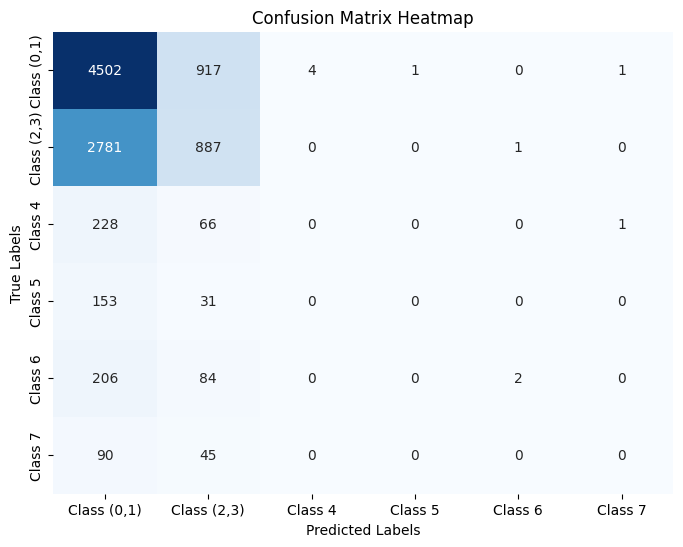

In [ ]:
column_names = ["Class (0,1)","Class (2,3)","Class 4","Class 5", "Class 6","Class 7"]
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(np.array(cm_clusf), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=column_names, yticklabels=column_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

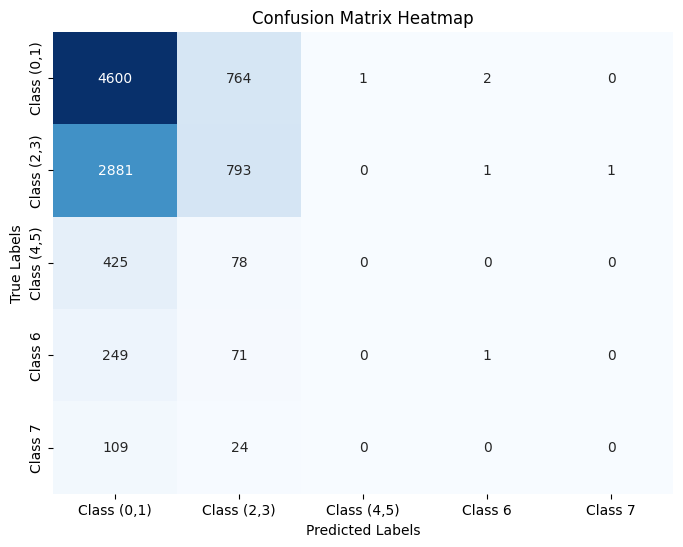

In [ ]:
column_names = ["Class (0,1)","Class (2,3)","Class (4,5)","Class 6","Class 7"]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(np.array(cm_clus2), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=column_names, yticklabels=column_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
cm_clus3=confusion_matrix(y_test_clus3,prediction_clus3)
cm_clus3

array([[4582,  784,    1,    0,    0],
       [2876,  800,    0,    0,    0],
       [ 251,   51,    0,    0,    0],
       [ 283,   51,    0,    0,    0],
       [ 251,   70,    0,    0,    0]])

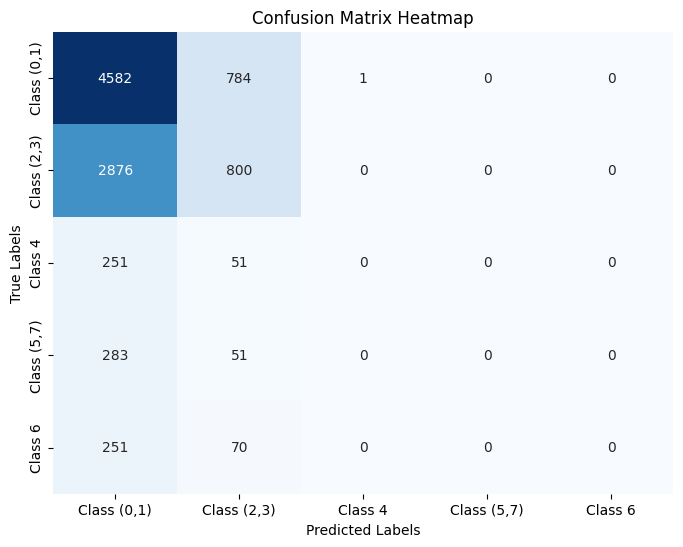

In [ ]:
column_names = ["Class (0,1)","Class (2,3)","Class 4","Class (5,7)","Class 6"]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(np.array(cm_clus3), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=column_names, yticklabels=column_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
cm_clus4=confusion_matrix(y_test_clus4,prediction_clus4)
cm_clus4

array([[4578,  787,    0,    2,    0],
       [2906,  769,    0,    1,    0],
       [ 361,   74,    0,    0,    0],
       [ 176,   25,    0,    0,    0],
       [ 251,   70,    0,    0,    0]])

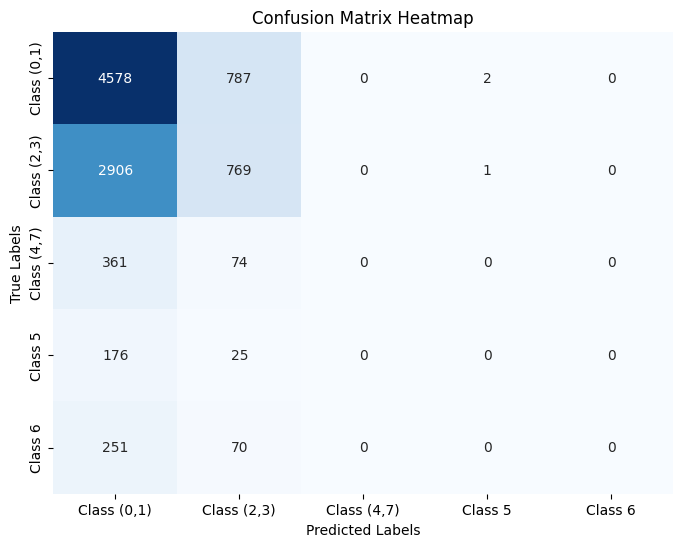

In [ ]:
column_names = ["Class (0,1)","Class (2,3)","Class (4,7)","Class 5","Class 6"]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(np.array(cm_clus4), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=column_names, yticklabels=column_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
cm_clus5=confusion_matrix(y_test_clus5,prediction_clus5)
cm_clus5

array([[4574,  790,    3,    0,    0],
       [2898,  775,    0,    3,    0],
       [ 248,   54,    0,    0,    0],
       [ 424,   98,    0,    0,    0],
       [ 113,   20,    0,    0,    0]])

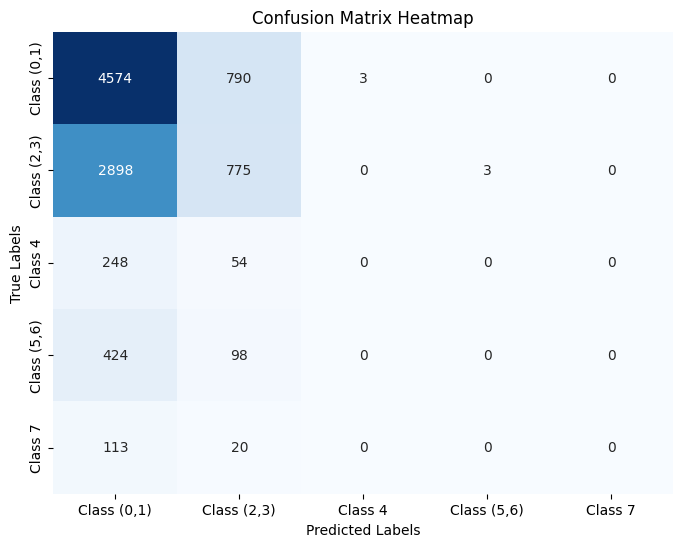

In [ ]:
column_names = ["Class (0,1)","Class (2,3)","Class 4","Class (5,6)","Class 7"]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(np.array(cm_clus5), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=column_names, yticklabels=column_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
cm_clus6=confusion_matrix(y_test_clus6,prediction_clus6)
cm_clus6

array([[4599,  766,    1,    1,    0],
       [2918,  754,    2,    1,    1],
       [ 514,  109,    0,    0,    0],
       [ 174,   26,    1,    0,    0],
       [ 111,   22,    0,    0,    0]])

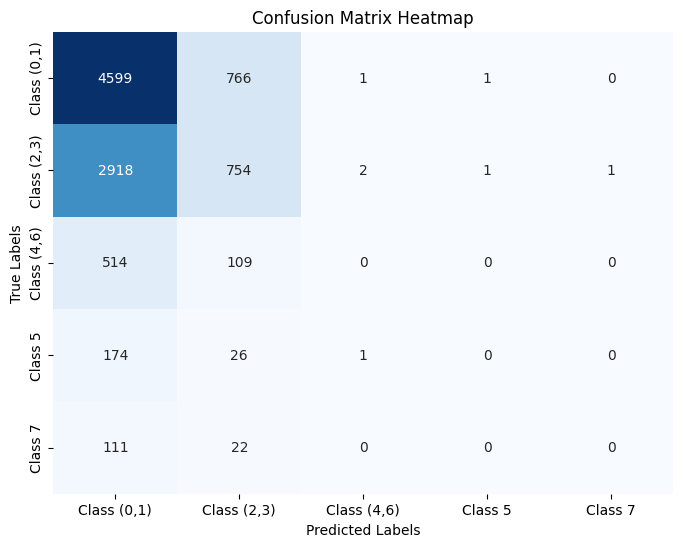

In [ ]:
column_names = ["Class (0,1)","Class (2,3)","Class (4,6)","Class 5","Class 7"]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(np.array(cm_clus6), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=column_names, yticklabels=column_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
prediction_f

array([3, 1, 1, ..., 1, 1, 1])

In [ ]:
print("accuracy",accuracy_score(y_test_f,prediction_f))

accuracy 0.5391


In [ ]:
unique_1=np.unique(prediction1_1)
#Accuracy obtained
print("accuracy",accuracy_score(y_test_1,prediction1_1))
print(unique_1)

accuracy 0.5394
[1 3 5 6 7]


In [ ]:
print("accuracy",accuracy_score(y_test_clus3,prediction_clus3))
print("accuracy",accuracy_score(y_test_clus4,prediction_clus4))
print("accuracy",accuracy_score(y_test_clus5,prediction_clus5))
print("accuracy",accuracy_score(y_test_clus6,prediction_clus6))

accuracy 0.5382
accuracy 0.5347
accuracy 0.5349
accuracy 0.5353


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded_1 = label_encoder.fit_transform(y_train_1)

# Verify the encoding
print("Encoded labels:", np.unique(y_train_encoded_1))

Encoded labels: [0 1 2 3 4]


In [ ]:
xgb_model_2 = xgb.XGBClassifier(objective="multi:softmax",
                                learning_rate=0.1,
                                num_class=5
                              )

In [ ]:
xgb_model_2.fit(X_train_1,y_train_encoded_1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [ ]:
prediction_xgb_model_2=xgb_model_2.predict(X_test_1)
print(np.unique(prediction_xgb_model_2))

[0 1 2 3]


In [ ]:
print("accuracy",accuracy_score(prediction_xgb_model_2,y_test))

accuracy 0.4081


In [ ]:
data111_0_1 = data111[(data111['cluster'] == 0) | (data111['cluster'] == 1)]

In [ ]:
data111_2_3 = data111[(data111['cluster'] == 2) | (data111['cluster'] == 3)]

In [ ]:
data111_4_5 = data111[(data111['cluster'] == 4) | (data111['cluster'] == 5)]

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model_01 = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8
)

# Initialize and configure the LGBMClassifier
lgbm_model_01 = lgb.LGBMClassifier(
    objective='binary',
    learning_rate=0.1,
    num_leaves=31,
    min_child_samples=5,
    n_estimators=100
)

xgb_model_23 = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8
)

# Initialize and configure the LGBMClassifier
lgbm_model_23 = lgb.LGBMClassifier(
    objective='binary',
    learning_rate=0.1,
    num_leaves=31,
    min_child_samples=5,
    n_estimators=100
)
xgb_model_45 = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8
)

# Initialize and configure the LGBMClassifier
lgbm_model_45 = lgb.LGBMClassifier(
    objective='binary',
    learning_rate=0.1,
    num_leaves=31,
    min_child_samples=5,
    n_estimators=100
)

In [ ]:
data111_2_3['cluster']

10384359    2
2419604     2
4222033     2
13159724    2
2100521     2
           ..
7880560     3
3670966     2
18487433    2
13792718    3
11825126    2
Name: cluster, Length: 18223, dtype: int64

In [ ]:
X_0_1=data111_0_1.drop(["cluster2","cluster","cluster3","cluster4","cluster5","cluster6"],axis=1)
y_0_1= data111_0_1['cluster']

X_2_3=data111_2_3.drop(["cluster2","cluster","cluster3","cluster4","cluster5","cluster6"],axis=1)
y_2_3= data111_2_3['cluster']

X_4_5=data111_4_5.drop(["cluster2","cluster","cluster3","cluster4","cluster5","cluster6"],axis=1)
y_4_5= data111_4_5['cluster']

In [ ]:
X_4_5

,nCount_RNA,nFeature_RNA,Expression
10266167,14986,3187,1
18558716,22681,4109,1
16117054,10211,2930,1
12661671,96084,7825,6
7373469,14986,3187,1
...,...,...,...
5281420,12714,2731,37
3009309,1888,661,7
3969019,8309,1969,2
14193565,8332,2421,2


In [ ]:
X_train_0_1,X_test_0_1,y_train_0_1,y_test_0_1 = train_test_split(X_0_1,y_0_1,test_size=0.2,random_state=42)

X_train_2_3,X_test_2_3,y_train_2_3,y_test_2_3 = train_test_split(X_2_3,y_2_3,test_size=0.2,random_state=42)

X_train_4_5,X_test_4_5,y_train_4_5,y_test_4_5 = train_test_split(X_4_5,y_4_5,test_size=0.2,random_state=42)

In [ ]:
y_train_0_1.value_counts()

cluster
0    19153
1     2410
Name: count, dtype: int64

In [ ]:
lgbm_model_01.fit(X_train_0_1,y_train_0_1)

lgbm_model_23.fit(X_train_2_3,y_train_2_3)

lgbm_model_45.fit(X_train_4_5,y_train_4_5)

[LightGBM] [Info] Number of positive: 2410, number of negative: 19153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 21563, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111766 -> initscore=-2.072833
[LightGBM] [Info] Start training from score -2.072833
[LightGBM] [Info] Number of positive: 3038, number of negative: 11540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 14578, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.208396 -> initscore=-1.334620
[LightGB

LGBMClassifier(min_child_samples=5, objective='binary')

In [ ]:
prediction_binary_01=lgbm_model_01.predict(X_test_0_1)
accuracy_score(prediction_binary_01,y_test_0_1)

0.8896308662585791

In [ ]:
prediction_binary_23=lgbm_model_23.predict(X_test_2_3)
accuracy_score(prediction_binary_23,y_test_2_3)

0.792318244170096

In [ ]:
prediction_binary_45=lgbm_model_45.predict(X_test_4_5)
accuracy_score(prediction_binary_45,y_test_4_5)

0.5923076923076923

**POST- Project work**

In [ ]:
df_post=pd.read_csv('/content/drive/MyDrive/AIBD/Project/data111.csv')
df_post.head()

,Unnamed: 0,nCount_RNA,nFeature_RNA,cluster,Expression
0,4516075,10160,2164,0,1
1,10353870,24430,4461,1,1
2,9010371,26676,5134,2,5
3,9538175,73759,7905,0,3
4,2309763,10722,2587,0,31


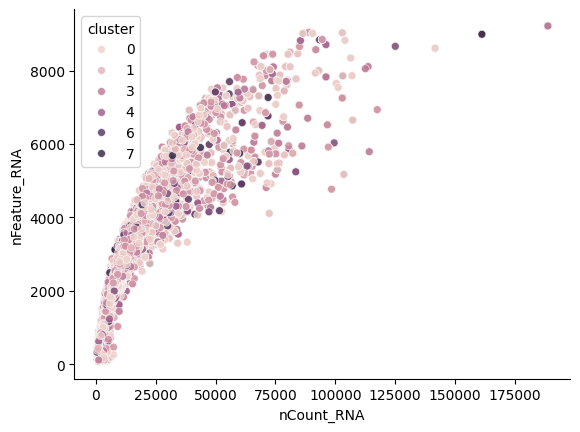

In [ ]:
sns.scatterplot(x='nCount_RNA', y='nFeature_RNA', hue='cluster', data=df_post, s=32, alpha=0.8)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

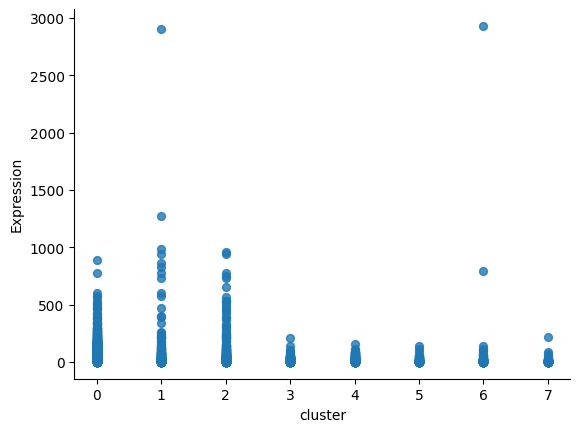

In [ ]:
# @title cluster vs Expression

from matplotlib import pyplot as plt
df_post.plot(kind='scatter', x='cluster', y='Expression', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

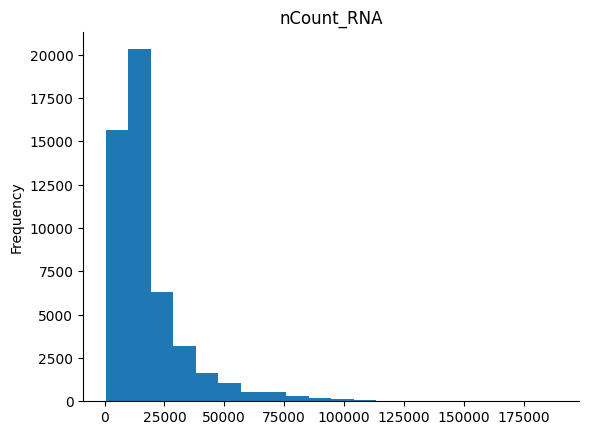

In [ ]:
# @title nCount_RNA

from matplotlib import pyplot as plt
df_post['nCount_RNA'].plot(kind='hist', bins=20, title='nCount_RNA')
plt.gca().spines[['top', 'right',]].set_visible(False)